Varianza explicada por cada componente:
 [0.41739469 0.25807404 0.15705432 0.12206414 0.04541281]
Varianza explicada acumulada:
 [0.41739469 0.67546872 0.83252305 0.95458719 1.        ]


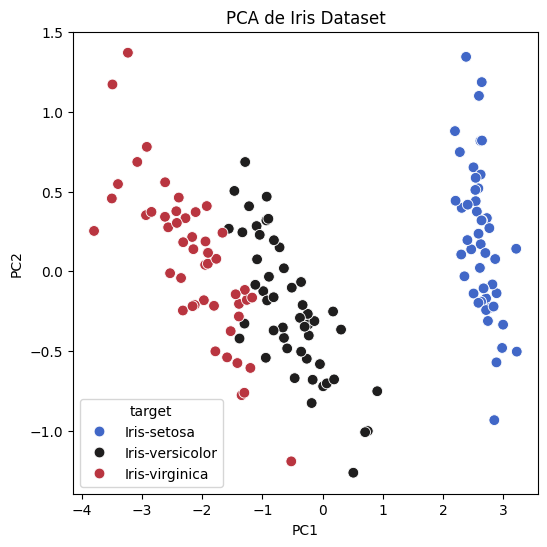

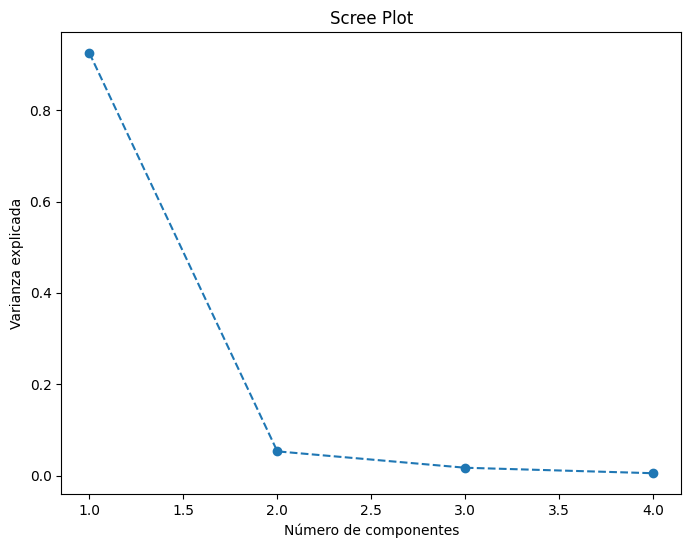

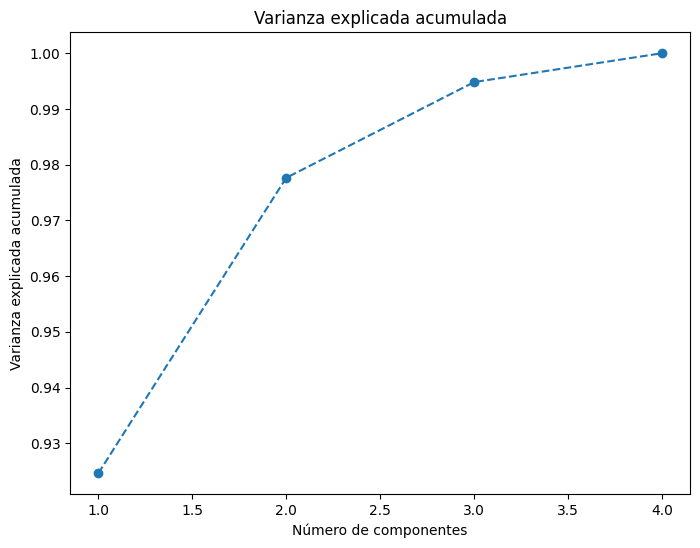

Matriz de covarianza:
 [[ 14. -11.]
 [-11.  23.]]
Eigenvalores:
 [ 6.61513568 30.38486432]
Eigenvectores:
 [[-0.83025082 -0.55738997]
 [-0.55738997  0.83025082]]


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

# Función PCA
def PCA(X, num_componentes):
    X_centrada = X - np.mean(X, axis=0)
    S = np.cov(X_centrada, rowvar=False)
    eigen_valores, eigen_vectores = np.linalg.eigh(S)
    indices_ordenados = np.argsort(eigen_valores)[::-1]
    eigen_valores_ordenados = eigen_valores[indices_ordenados]
    eigen_vectores_ordenados = eigen_vectores[:, indices_ordenados]
    eigenvectores_seleccionados = eigen_vectores_ordenados[:, :num_componentes]
    X_reducido = np.dot(X_centrada, eigenvectores_seleccionados)
    return X_reducido, eigen_valores_ordenados

# Creación de datos sintéticos
np.random.seed(1)
X = np.random.randint(10, 50, 100)
Y = X.reshape(20, 5)
Y_centrada = Y - np.mean(Y, axis=0)
S = np.cov(Y_centrada, rowvar=False)
eigen_valores, eigen_vectores = np.linalg.eigh(S)
indices_ordenados = np.argsort(eigen_valores)[::-1]
eigen_valores_ordenados = eigen_valores[indices_ordenados]
eigen_vectores_ordenados = eigen_vectores[:, indices_ordenados]

# Proyección de los datos centrados en los primeros 2 componentes principales
n_componentes = 2
eigenvectores_seleccionados = eigen_vectores_ordenados[:, :n_componentes]
Y_reducido = np.dot(Y_centrada, eigenvectores_seleccionados)

# Varianza explicada
varianza_explicada = eigen_valores_ordenados / np.sum(eigen_valores_ordenados)
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada por cada componente:\n", varianza_explicada)
print("Varianza explicada acumulada:\n", varianza_explicada_acumulada)

# PCA en el conjunto de datos Iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
X_iris = data.iloc[:, 0:4].values
y_iris = data.iloc[:, 4].values
X_iris_reducido, _ = PCA(X_iris, 2)
principal_df = pd.DataFrame(data=X_iris_reducido, columns=['PC1', 'PC2'])
principal_df = pd.concat([principal_df, data[['target']]], axis=1)

# Visualización de las dos primeras componentes principales
plt.figure(figsize=(6, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60, palette='icefire')
plt.title('PCA de Iris Dataset')
plt.show()

# PCA usando sklearn para graficar Scree plot y varianza explicada acumulada
pca = sklearnPCA()
X_iris_transformado = pca.fit_transform(X_iris)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 5), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show()

# Graficar varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 5), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

# Ejercicio de Componentes Principales
X1 = np.array([4, 8, 13, 7])
X2 = np.array([11, 4, 5, 14])
S = np.cov([X1, X2])
eigen_val, eigen_vec = np.linalg.eigh(S)

print("Matriz de covarianza:\n", S)
print("Eigenvalores:\n", eigen_val)
print("Eigenvectores:\n", eigen_vec)
